In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

In [2]:
# Create matrix
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 1, 11, 12], 
              [20, 100, 15, 16],
              [1, 5, 2, 1], 
              [0, 0, 1, 100]])

In [3]:
#Calculate cosine between two vectors
def cosine(x, y):
    return dot(x, y)/(norm(x)*norm(y))

In [4]:
vec_1 = A[1]
vec_2 = A[3]

cosine(vec_1, vec_2)

0.678067008902815

In [5]:
vec_1 = A[2]
vec_2 = A[4]

cosine(vec_1, vec_2)

0.4628024539361702

In [6]:
#SVD of the matrix.

U, S, VT = np.linalg.svd(A, full_matrices=False)

In [7]:
U

array([[-0.04193177, -0.0129508 , -0.15350846,  0.71100145],
       [-0.10176134, -0.00679149, -0.4400771 ,  0.37534404],
       [-0.10473899, -0.06440538, -0.86835755, -0.35561329],
       [-0.77426772,  0.62435902,  0.07748981, -0.05575232],
       [-0.04137662,  0.03077455, -0.06031193,  0.47316774],
       [-0.61295479, -0.77773185,  0.13813132, -0.0117029 ]])

In [8]:
S

array([111.42883227,  93.88553336,  15.186801  ,   1.5757661 ])

In [9]:
VT

array([[-0.15274431, -0.70388268, -0.12833283, -0.68172504],
       [ 0.12665847,  0.66526457,  0.08365879, -0.73101429],
       [-0.57152442,  0.23912766, -0.78444062,  0.02882214],
       [-0.79623278,  0.06921113,  0.60098653, -0.00619428]])

In [10]:
S.shape

(4,)

In [11]:
S**2/np.sum(S**2)

array([5.78474872e-01, 4.10664060e-01, 1.07453841e-02, 1.15683880e-04])

In [12]:
#Variance from the first two principal components
sum(list(S**2/np.sum(S**2))[:2])

0.9891389320030759

In [13]:
S_full = np.zeros((4, 4))

In [14]:
#Convert vector of singular values to dig. matrix.
for i, j in enumerate(list(S)):
    S_full[i][i] = j

In [15]:
S_full

array([[111.42883227,   0.        ,   0.        ,   0.        ],
       [  0.        ,  93.88553336,   0.        ,   0.        ],
       [  0.        ,   0.        ,  15.186801  ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.5757661 ]])

In [16]:
S_full.shape

(4, 4)

In [17]:
#Reconstruct matrix from components.
U.dot(S_full).dot(VT)

array([[ 1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
         4.00000000e+00],
       [ 5.00000000e+00,  6.00000000e+00,  7.00000000e+00,
         8.00000000e+00],
       [ 9.00000000e+00,  1.00000000e+00,  1.10000000e+01,
         1.20000000e+01],
       [ 2.00000000e+01,  1.00000000e+02,  1.50000000e+01,
         1.60000000e+01],
       [ 1.00000000e+00,  5.00000000e+00,  2.00000000e+00,
         1.00000000e+00],
       [ 1.45661261e-13, -2.84217094e-14,  1.00000000e+00,
         1.00000000e+02]])

In [18]:
#Choose dim for data viz
num_sig = 2

In [19]:
# Create singular value matrix for reduced dim
S_full = S_full[:, : num_sig]
S_full

array([[111.42883227,   0.        ],
       [  0.        ,  93.88553336],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [20]:
# Create right singular matrix for reduced dim
VT = VT[:num_sig, :]
VT

array([[-0.15274431, -0.70388268, -0.12833283, -0.68172504],
       [ 0.12665847,  0.66526457,  0.08365879, -0.73101429]])

In [21]:
#Recalculate A in reduced dim
U.dot(S_full)

array([[ -4.67240832,  -1.21589315],
       [-11.33914778,  -0.63762294],
       [-11.67094308,  -6.04673388],
       [-86.27574764,  58.61827992],
       [ -4.61054843,   2.88928463],
       [-68.30083667, -73.01776989]])

In [22]:
#Recalculate A in reduced dim
A.dot(VT.T)

array([[ -4.67240832,  -1.21589315],
       [-11.33914778,  -0.63762294],
       [-11.67094308,  -6.04673388],
       [-86.27574764,  58.61827992],
       [ -4.61054843,   2.88928463],
       [-68.30083667, -73.01776989]])

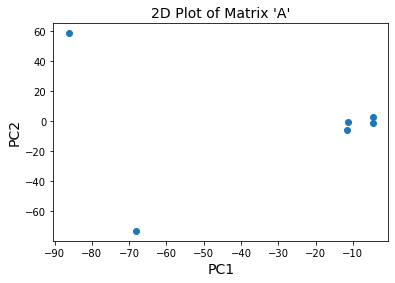

In [23]:
#Plot values in reduced dim.
x = A.dot(VT.T)[:,0]
y = A.dot(VT.T)[:,1]

plt.scatter(x, y)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title("2D Plot of Matrix 'A'", fontsize=14)
plt.show()

In [24]:
cosine(A.dot(VT.T)[1], A.dot(VT.T)[3])

0.7942894361532875

In [25]:
cosine(A[1], A[3])

0.678067008902815